In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.plotly as py
from plotly.offline import iplot, init_notebook_mode
color = sns.color_palette()
df  = pd.read_csv("mass-shooting.csv",encoding = 'ISO-8859-1')
df['date'] = pd.to_datetime(df['Date'])
df['year'] = df['date'].dt.year

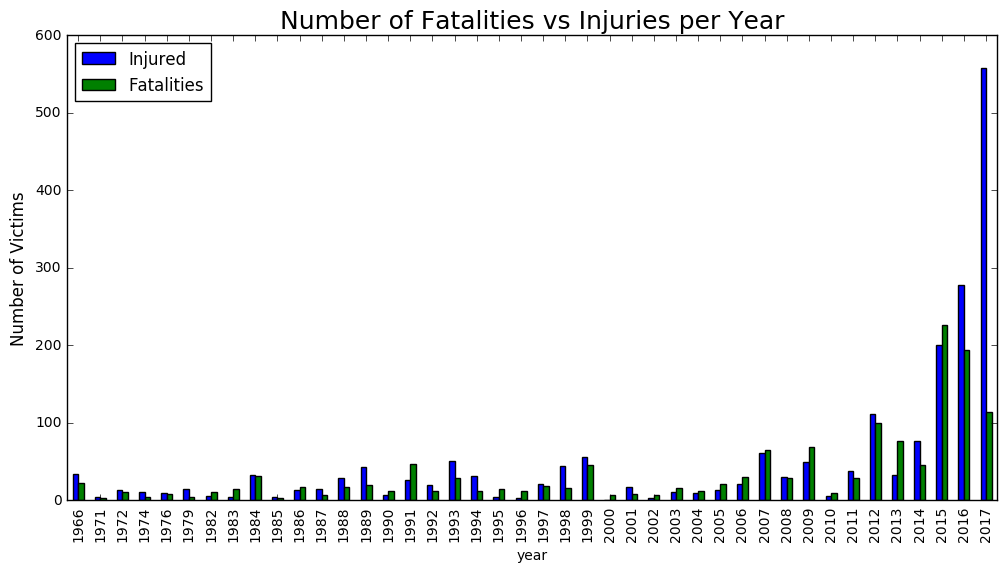

In [150]:
tot_victims = df[['year','Injured', 'Fatalities']].groupby('year').sum()

tot_victims.plot.bar(figsize=(12,6))
plt.ylabel('Number of Victims', fontsize=12)
plt.title('Number of Fatalities vs Injuries per Year', fontsize=18)
plt.show()

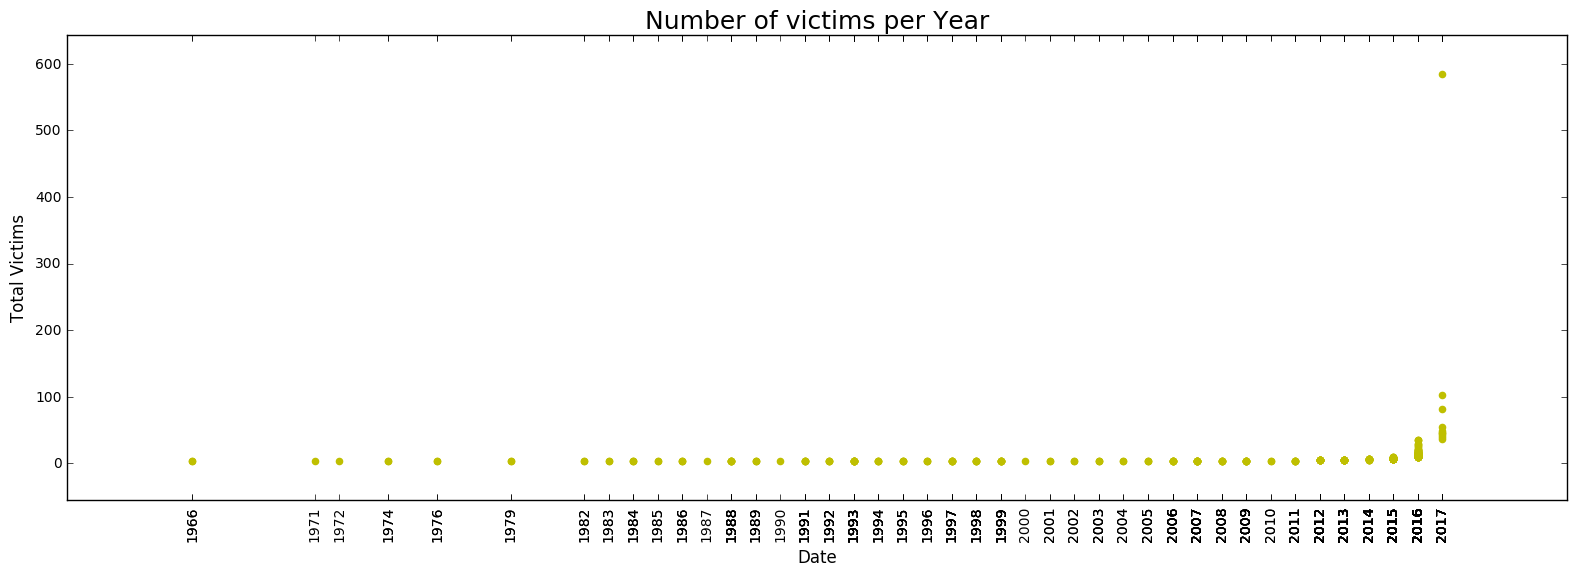

In [151]:
plt.figure(figsize=(8,6))
plt.xticks(np.sort(df['year']), rotation='vertical')
plt.margins(0.1,tight=True)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None,
                wspace=None, hspace=None)
plt.scatter(np.sort(df['year']), np.sort(df['Total victims'].values),color=color[5])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victims', fontsize=12)
plt.title('Number of victims per Year', fontsize=18)
plt.show()

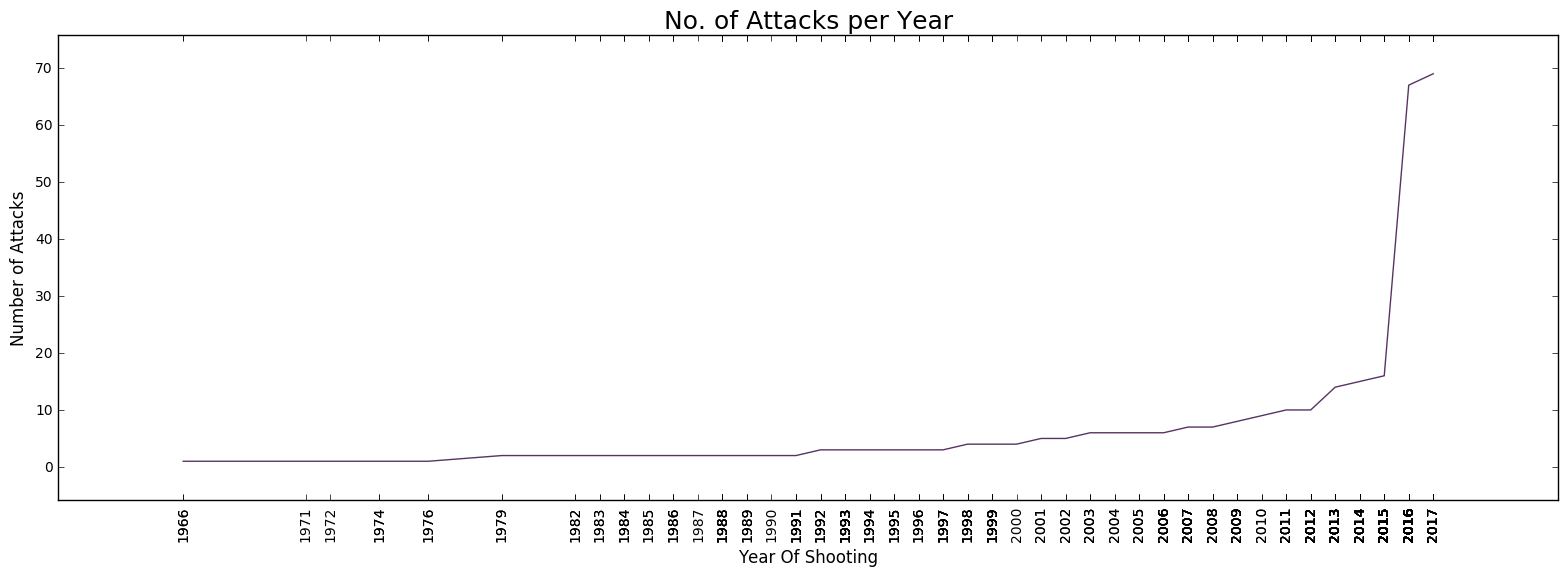

In [152]:
color =sns.cubehelix_palette(7)
cnt_srs = df['year'].value_counts()
plt.figure(figsize=(8,6))
plt.xticks(np.sort(df['year']), rotation='vertical')
plt.margins(0.1,tight=True)
plt.subplots_adjust(left=None, bottom=None, right=2, top=None,
                wspace=None, hspace=None)
plt.plot(np.sort(cnt_srs.index), np.sort(cnt_srs.values),color=color[5])
plt.xlabel('Year Of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.show()

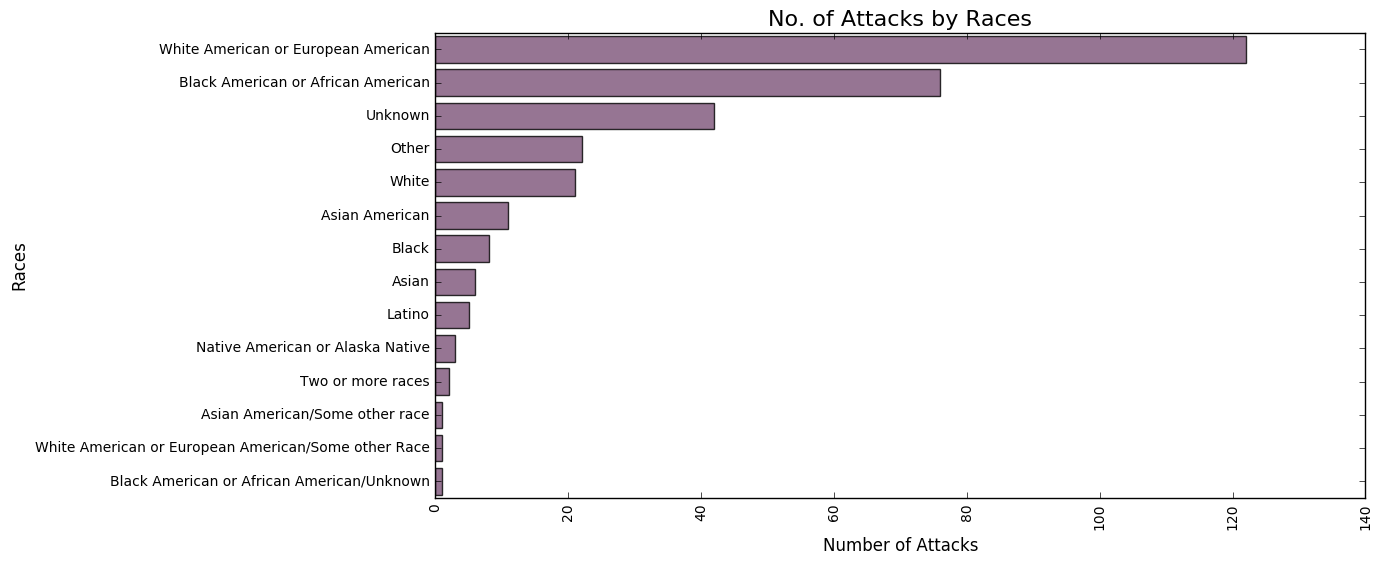

In [153]:
df.Race.replace(['white', 'black', 'Some other race', 'unclear'], ['White', 'Black', 'Other','Unknown'], inplace=True)

cnt_srs = df['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.values,cnt_srs.index, alpha=0.8, color=color[4])
plt.xticks(rotation='vertical')
plt.ylabel('Races', fontsize=12)
plt.xlabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=16)
plt.show()

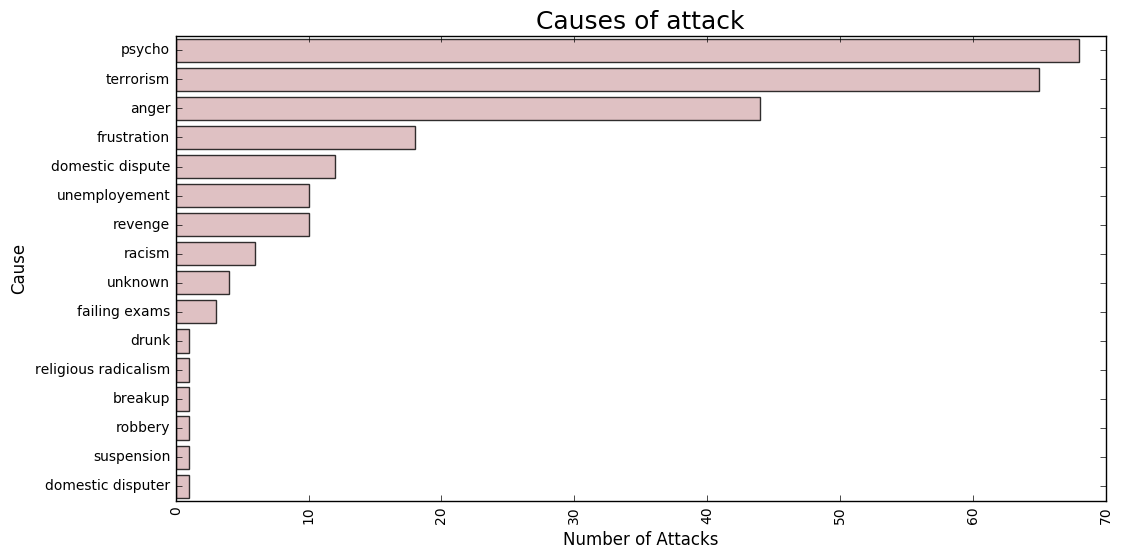

In [155]:
cnt_srs = df['Cause'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.values,cnt_srs.index, alpha=0.8, color=color[1])
plt.xticks(rotation='vertical')
plt.ylabel('Cause', fontsize=12)
plt.xlabel('Number of Attacks', fontsize=12)
plt.title('Causes of attack', fontsize=18)
plt.show()



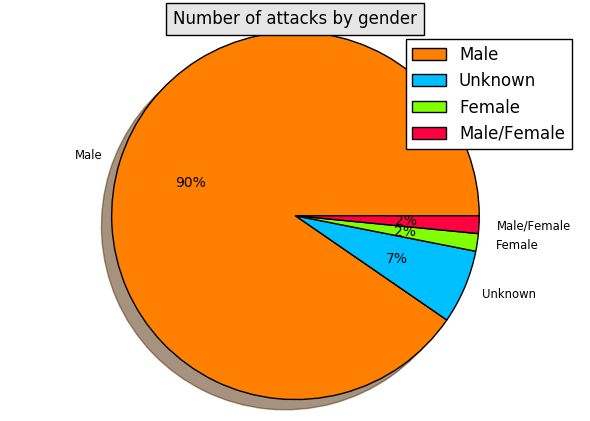

In [83]:
df.Gender.replace(['M', 'M/F'], ['Male', 'Male/Female'], inplace=True)
cnt_srs = df['Gender'].value_counts()
labels = cnt_srs.index
values = cnt_srs.values
colors = ['#ff8000', '#00bfff', '#80ff00', '#ff0040']
#patches, texts = plt.pie(values, shadow=True, startangle=90)
patches, texts, autotexts = plt.pie(values, labels=labels,
                                    autopct='%.0f%%',colors=colors,
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title('Number of attacks by gender', bbox={'facecolor':'0.9', 'pad':5})
plt.show()

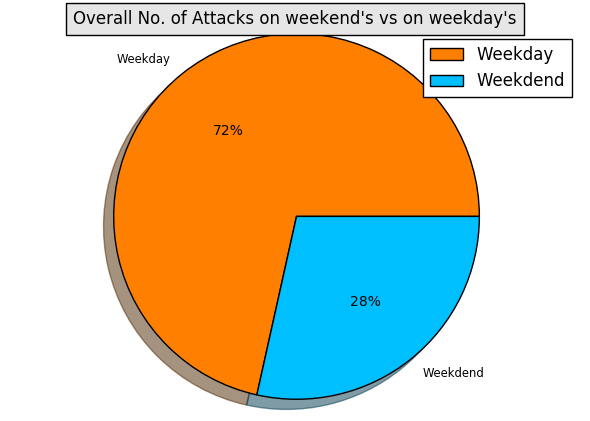

In [145]:
df['DoW'] = df['date'].dt.dayofweek
df['weekdayflg'] =( df['DoW'] // 5 != 1).astype(float)
cnt_srs = df['weekdayflg'].value_counts()
labels = ['Weekday','Weekdend']
values = cnt_srs.values
colors = ['#ff8000', '#00bfff', '#80ff00', '#ff0040']
#patches, texts = plt.pie(values, shadow=True, startangle=90)
patches, texts, autotexts = plt.pie(values, labels=labels,
                                    autopct='%.0f%%',colors=colors,
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.title("Overall No. of Attacks on weekend's vs on weekday's", bbox={'facecolor':'0.9', 'pad':5})
plt.show()

In [157]:
init_notebook_mode(connected=True)
df['text'] = df['date'].dt.strftime('%b %d , %Y'
                          ) + ', '+ df['Fatalities'].astype(str) + ' Fatalities'
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)"]
data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df[df.Longitude < 0]['Longitude'],
        lat = df[df.Longitude < 0]['Latitude'],
        text = df[df.Longitude < 0]['text'],
        mode = 'markers',
        marker = dict( 
            size = df[df.Longitude < 0]['Fatalities'] ** 0.5 * 5,
            opacity = 0.75,
            color = colors[np.random.choice(4,1)])
        )]

layout = dict(
         title = 'Shooting Fatalities by Latitude/Longitude in United States <br>'
                 '<sub>Hover to View Date and Fatalitiess</sub>',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(250, 250, 250)',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: VisibleDeprecationWarning:

converting an array with ndim > 0 to an index will result in an error in the future

